# ММО Сысойкин Егор ИУ5-21М РК1

## Вариант 15

### Задача 15

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "возведение в степень".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('cancer.csv', sep=",")

In [3]:
data.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [4]:
 def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

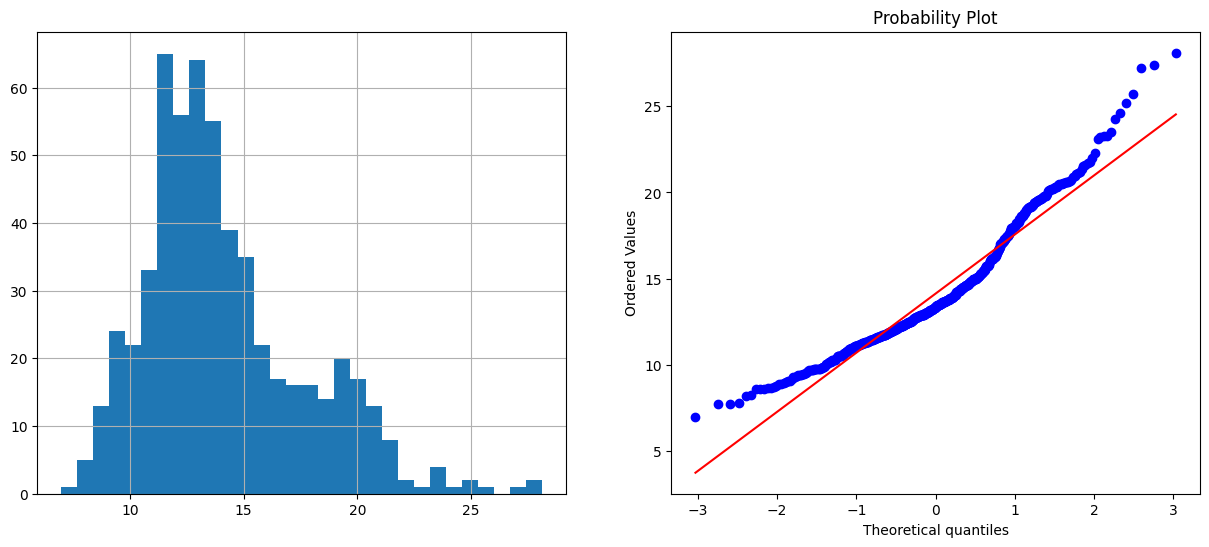

In [5]:
diagnostic_plots(data,"Radius (mean)")

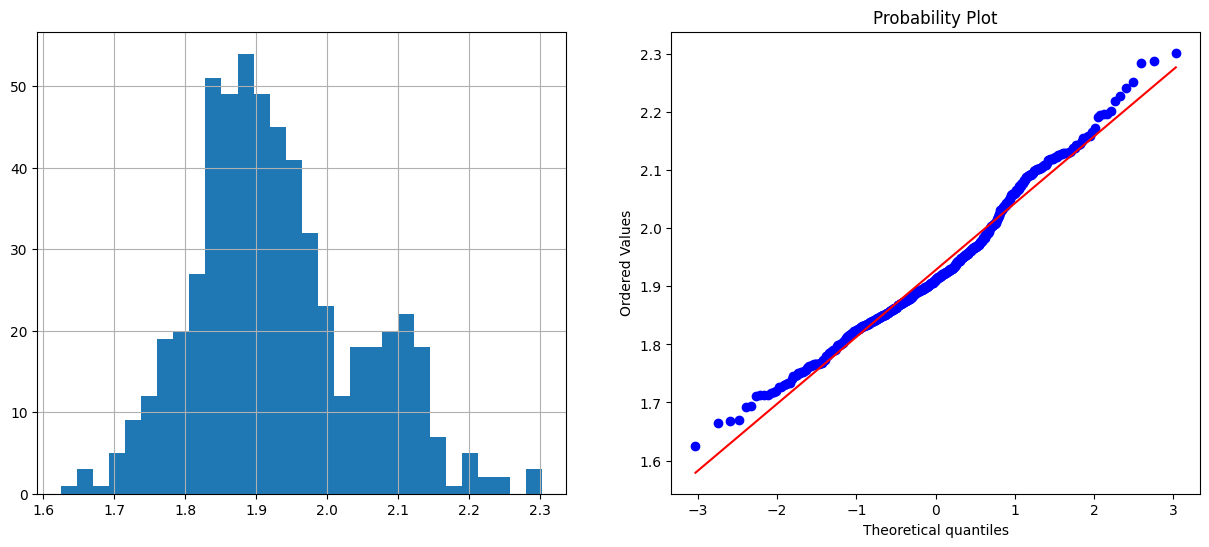

In [6]:
data['Radius_my'] = data['Radius (mean)']**(1/4)
diagnostic_plots(data, 'Radius_my')

### Задача 35

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе дерева решений.

In [19]:
data = pd.read_csv('insurance.csv', sep=",")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
data["smoker_enc"] = data.apply(lambda x: 1 if x['smoker'] == 'yes' else 0, axis=1)
data["sex_enc"] = data.apply(lambda x: 1 if x['sex'] == 'male' else 0, axis=1)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['region_enc'] = le.fit_transform(data['region'])
data.head()

,age,sex,bmi,children,smoker,region,charges,smoker_enc,sex_enc,region_enc
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,3
1,18,male,33.770,1,no,southeast,1725.55230,0,1,2
2,28,male,33.000,3,no,southeast,4449.46200,0,1,2
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1


In [22]:
data = data.drop(columns=['sex', 'smoker', 'region'])

In [23]:
data.head()

,age,bmi,children,charges,smoker_enc,sex_enc,region_enc
0,19,27.900,0,16884.92400,1,0,3
1,18,33.770,1,1725.55230,0,1,2
2,28,33.000,3,4449.46200,0,1,2
3,33,22.705,0,21984.47061,0,1,1
4,32,28.880,0,3866.85520,0,1,1


In [24]:
data.dtypes

age             int64
bmi           float64
children        int64
charges       float64
smoker_enc      int64
sex_enc         int64
region_enc      int64
dtype: object

In [25]:
dataX = data[['age', 'bmi', 'children', 'charges', 'smoker_enc', 'sex_enc']]
dataY = data[['region_enc']]

In [26]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(dataX, dataY)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([0.21080699, 0.33234935, 0.09214304, 0.30677273, 0.01436694,
        0.04356094]),
 0.9999999999999999)

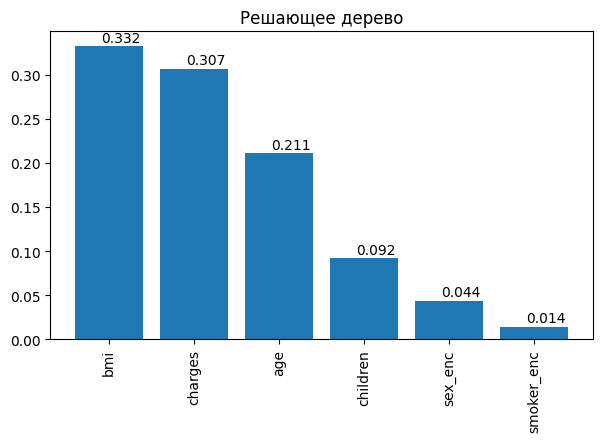

In [27]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

_,_=draw_feature_importances(dtc1, dataX, 'Решающее дерево')


### Дополнительное задание

для пары произвольных колонок данных построить график "Диаграмма рассеяния".

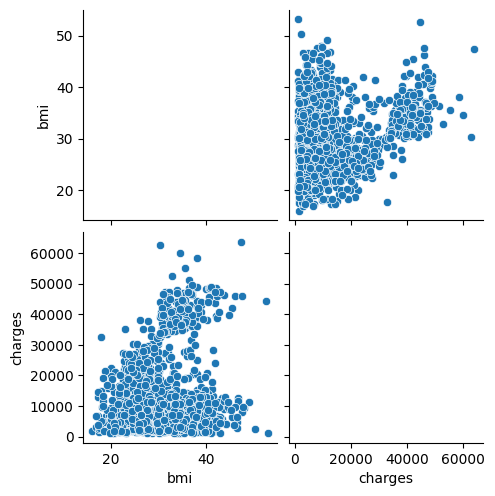

In [29]:
sns.pairplot(data=data, vars=['bmi', 'charges'], diag_kind="scatter")